In [41]:
df<-read.csv("../movies2/First_Price.csv",fileEncoding = 'utf-8',stringsAsFactors = F)

actor_score_df <- read.csv("../movies/actor_score_109_ver2.csv" ,fileEncoding = 'utf-8',stringsAsFactors = F)
actor_score_df2 <- read.csv("../movies/actor_score_109_ver3.csv" ,fileEncoding = 'utf-8',stringsAsFactors = F)
actor_score_df3 <- read.csv("../movies/actor_score_109.csv" ,fileEncoding = 'utf-8',stringsAsFactors = F)
bae <- read.csv("../movies2/plzFinal_ML.csv",fileEncoding = 'utf-8',stringsAsFactors = F)

In [42]:
head(actor_score_df)

주연,횟수,점수,평균점수,최종점수
송강호,11,174,15.81818,7.243133
오달수,11,172,15.63636,7.201385
하정우,15,190,12.66667,7.004127
류승룡,8,130,16.25000,6.779524
유해진,13,141,10.84615,6.253508
황정민,13,140,10.76923,6.231293


In [43]:
head(actor_score_df3)

주연,횟수,점수,평균점수
송강호,7,24,3.428571
백윤식,3,10,3.333333
황정민,7,21,3.000000
조정석,3,9,3.000000
성동일,4,11,2.750000
오달수,4,11,2.750000


In [44]:
head(df,1)
str(df)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,배우누적점수,배우점수,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배급사점수
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,6.5,4,3,10,9,TRUE,FALSE,FALSE,FALSE,2


'data.frame':	108 obs. of  28 variables:
 $ 영화명              : chr  "7급 공무원" "82년생 김지영" "감기" "강철중: 공공의 적 1-1" ...
 $ 누적매출액          : num  2.64e+10 3.03e+10 2.18e+10 2.86e+10 2.06e+10 ...
 $ 누적관객수          : int  4039891 3678156 3117859 4313101 3024666 4111237 3134421 3755233 3587182 3420172 ...
 $ 스크린수            : int  475 1486 806 707 432 593 299 1180 876 956 ...
 $ 상영횟수            : int  90779 145441 55046 74157 69946 106069 40642 101077 90288 95437 ...
 $ 개봉일              : chr  "2009-04-22" "2019-10-23" "2013-08-14" "2008-06-19" ...
 $ 배급사              : chr  "(주)롯데엔터테인먼트" "(주)롯데엔터테인먼트" "아이러브시네마" "CJ ENM" ...
 $ 등급                : chr  "12세이상관람가" "12세이상관람가" "15세이상관람가" "15세이상관람가" ...
 $ 장르                : chr  "코미디,액션,드라마,범죄" "드라마" "드라마,어드벤처,액션" "드라마,액션" ...
 $ 감독                : chr  "신태라" "김도영" "김성수" "강우석" ...
 $ 주연                : chr  "김하늘,강지환" "정유미,공유" "장혁,수애,박민하" "설경구,정재영" ...
 $ 제작사              : chr  "(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스" "(주)봄바람영화사" "아이러브시네마,(주)아이필름홀딩스,(주)씨

In [45]:
df$배우점수2 <- 0
df$배우점수3 <- 0
df$배우점수4 <- 0
df$배우점수5 <- 0


In [46]:
str(df)

'data.frame':	108 obs. of  32 variables:
 $ 영화명              : chr  "7급 공무원" "82년생 김지영" "감기" "강철중: 공공의 적 1-1" ...
 $ 누적매출액          : num  2.64e+10 3.03e+10 2.18e+10 2.86e+10 2.06e+10 ...
 $ 누적관객수          : int  4039891 3678156 3117859 4313101 3024666 4111237 3134421 3755233 3587182 3420172 ...
 $ 스크린수            : int  475 1486 806 707 432 593 299 1180 876 956 ...
 $ 상영횟수            : int  90779 145441 55046 74157 69946 106069 40642 101077 90288 95437 ...
 $ 개봉일              : chr  "2009-04-22" "2019-10-23" "2013-08-14" "2008-06-19" ...
 $ 배급사              : chr  "(주)롯데엔터테인먼트" "(주)롯데엔터테인먼트" "아이러브시네마" "CJ ENM" ...
 $ 등급                : chr  "12세이상관람가" "12세이상관람가" "15세이상관람가" "15세이상관람가" ...
 $ 장르                : chr  "코미디,액션,드라마,범죄" "드라마" "드라마,어드벤처,액션" "드라마,액션" ...
 $ 감독                : chr  "신태라" "김도영" "김성수" "강우석" ...
 $ 주연                : chr  "김하늘,강지환" "정유미,공유" "장혁,수애,박민하" "설경구,정재영" ...
 $ 제작사              : chr  "(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스" "(주)봄바람영화사" "아이러브시네마,(주)아이필름홀딩스,(주)씨

In [47]:

for(i in 1:nrow(df)){
    avg<-c()
    final<- c()
    for(j in 1:nrow(actor_score_df)){
        if(actor_score_df$주연[j] %in% unlist(strsplit(df$주연[i],","))){
            avg <- c(avg,actor_score_df$평균점수[j])
            final <- c(final,actor_score_df$최종점수[j])
        }
        
    }
    
    if(length(avg) > 0){
            df$배우점수2[i] <- max(avg)
    }
    if(length(final) > 0){
            df$배우점수3[i] <- max(final)
    }
}

In [48]:

for(i in 1:nrow(df)){
    avg<-c()
    final<- c()
    for(j in 1:nrow(actor_score_df2)){
        if(actor_score_df2$주연[j] %in% unlist(strsplit(df$주연[i],","))){
            avg <- c(avg,actor_score_df2$평균점수[j])
            final <- c(final,actor_score_df2$최종점수[j])
        }
        
    }
    
    if(length(avg) > 0){
            df$배우점수4[i] <- max(avg)
    }
    if(length(final) > 0){
            df$배우점수5[i] <- max(final)
    }
}


In [49]:
head(df)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배급사점수,배우점수2,배우점수3,배우점수4,배우점수5
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,9,TRUE,FALSE,FALSE,FALSE,2,4.000000,2.000000,0.000000,0.000000
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,8,TRUE,FALSE,FALSE,FALSE,2,8.250000,4.062019,8.250000,4.062019
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,...,8,FALSE,TRUE,FALSE,FALSE,1,4.000000,2.000000,0.000000,0.000000
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,CJ ENM,15세이상관람가,"드라마,액션",강우석,...,9,FALSE,TRUE,FALSE,FALSE,3,6.777778,4.509250,6.777778,4.509250
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,...,9,FALSE,TRUE,FALSE,FALSE,3,7.666667,5.153456,7.666667,5.153456
건축학개론,30223590400,4111237,593,106069,2012-03-22,(주)롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,10,TRUE,FALSE,FALSE,FALSE,2,6.500000,3.031895,3.250000,2.549510


In [50]:
str(df)

'data.frame':	108 obs. of  32 variables:
 $ 영화명              : chr  "7급 공무원" "82년생 김지영" "감기" "강철중: 공공의 적 1-1" ...
 $ 누적매출액          : num  2.64e+10 3.03e+10 2.18e+10 2.86e+10 2.06e+10 ...
 $ 누적관객수          : int  4039891 3678156 3117859 4313101 3024666 4111237 3134421 3755233 3587182 3420172 ...
 $ 스크린수            : int  475 1486 806 707 432 593 299 1180 876 956 ...
 $ 상영횟수            : int  90779 145441 55046 74157 69946 106069 40642 101077 90288 95437 ...
 $ 개봉일              : chr  "2009-04-22" "2019-10-23" "2013-08-14" "2008-06-19" ...
 $ 배급사              : chr  "(주)롯데엔터테인먼트" "(주)롯데엔터테인먼트" "아이러브시네마" "CJ ENM" ...
 $ 등급                : chr  "12세이상관람가" "12세이상관람가" "15세이상관람가" "15세이상관람가" ...
 $ 장르                : chr  "코미디,액션,드라마,범죄" "드라마" "드라마,어드벤처,액션" "드라마,액션" ...
 $ 감독                : chr  "신태라" "김도영" "김성수" "강우석" ...
 $ 주연                : chr  "김하늘,강지환" "정유미,공유" "장혁,수애,박민하" "설경구,정재영" ...
 $ 제작사              : chr  "(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스" "(주)봄바람영화사" "아이러브시네마,(주)아이필름홀딩스,(주)씨

In [51]:
df2 <- subset(df,select = c(cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5))

In [52]:
df2

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.250000,4.062019,8.250000,4.062019
1,3117859,36.90476,1,10,0,2.333333,4.000000,4.000000,2.000000,0.000000,0.000000
1,4313101,35.27944,3,10,3,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250
1,3024666,21.64329,3,10,0,3.500000,7.666667,7.666667,5.153456,7.666667,5.153456
1,4111237,28.49592,2,20,6,3.500000,6.500000,6.500000,3.031895,3.250000,2.549510
1,3134421,18.14320,1,10,1,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250
1,3755233,40.17705,3,10,5,1.500000,11.750000,11.750000,4.959511,11.750000,4.959511
1,3587182,34.01942,1,10,7,4.000000,4.000000,4.000000,2.000000,0.000000,0.000000
1,3420172,32.55022,3,10,4,4.000000,11.375000,11.375000,5.672156,11.375000,5.672156


In [53]:
df

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배급사점수,배우점수2,배우점수3,배우점수4,배우점수5
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,9,TRUE,FALSE,FALSE,FALSE,2,4.000000,2.000000,0.000000,0.000000
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,8,TRUE,FALSE,FALSE,FALSE,2,8.250000,4.062019,8.250000,4.062019
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,...,8,FALSE,TRUE,FALSE,FALSE,1,4.000000,2.000000,0.000000,0.000000
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,CJ ENM,15세이상관람가,"드라마,액션",강우석,...,9,FALSE,TRUE,FALSE,FALSE,3,6.777778,4.509250,6.777778,4.509250
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,...,9,FALSE,TRUE,FALSE,FALSE,3,7.666667,5.153456,7.666667,5.153456
건축학개론,30223590400,4111237,593,106069,2012-03-22,(주)롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,10,TRUE,FALSE,FALSE,FALSE,2,6.500000,3.031895,3.250000,2.549510
공공의 적 2,20091127000,3134421,299,40642,2005-01-27,(주)시네마서비스,15세관람가,드라마,강우석,...,12,FALSE,TRUE,FALSE,FALSE,1,6.777778,4.509250,6.777778,4.509250
국가부도의 날,30893315837,3755233,1180,101077,2018-11-28,CJ ENM,12세이상관람가,드라마,최국희,...,9,TRUE,FALSE,FALSE,FALSE,3,11.750000,4.959511,11.750000,4.959511
귀향,27249801990,3587182,876,90288,2016-02-24,(주)와우픽쳐스,15세이상관람가,드라마,조정래,...,9,FALSE,TRUE,FALSE,FALSE,1,4.000000,2.000000,0.000000,0.000000
그것만이 내 세상,27456797382,3420172,956,95437,2018-01-17,CJ ENM,12세이상관람가,"코미디,드라마",최성현,...,9,TRUE,FALSE,FALSE,FALSE,3,11.375000,5.672156,11.375000,5.672156


In [54]:
write.csv( df2, "../movies2/fortest1.csv",row.names=F,fileEncoding='utf-8')

In [55]:
df3 <- subset(df,select = c(cluster,누적관객수,스크린점유율,배급사,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5))

In [56]:
df3[df3$스크린점유율 == 42.44885 ,]

cluster,누적관객수,스크린점유율,배급사,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5


In [57]:
jo <- read.csv("../movies2/jo_score.csv")

In [58]:
str(df)

'data.frame':	108 obs. of  32 variables:
 $ 영화명              : chr  "7급 공무원" "82년생 김지영" "감기" "강철중: 공공의 적 1-1" ...
 $ 누적매출액          : num  2.64e+10 3.03e+10 2.18e+10 2.86e+10 2.06e+10 ...
 $ 누적관객수          : int  4039891 3678156 3117859 4313101 3024666 4111237 3134421 3755233 3587182 3420172 ...
 $ 스크린수            : int  475 1486 806 707 432 593 299 1180 876 956 ...
 $ 상영횟수            : int  90779 145441 55046 74157 69946 106069 40642 101077 90288 95437 ...
 $ 개봉일              : chr  "2009-04-22" "2019-10-23" "2013-08-14" "2008-06-19" ...
 $ 배급사              : chr  "(주)롯데엔터테인먼트" "(주)롯데엔터테인먼트" "아이러브시네마" "CJ ENM" ...
 $ 등급                : chr  "12세이상관람가" "12세이상관람가" "15세이상관람가" "15세이상관람가" ...
 $ 장르                : chr  "코미디,액션,드라마,범죄" "드라마" "드라마,어드벤처,액션" "드라마,액션" ...
 $ 감독                : chr  "신태라" "김도영" "김성수" "강우석" ...
 $ 주연                : chr  "김하늘,강지환" "정유미,공유" "장혁,수애,박민하" "설경구,정재영" ...
 $ 제작사              : chr  "(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스" "(주)봄바람영화사" "아이러브시네마,(주)아이필름홀딩스,(주)씨

In [59]:
df$조연점수 =0

In [60]:
for(i in 1:nrow(df)){
    avg<-c()
    for(j in 1:nrow(jo)){
        if(jo$조연[j] %in% unlist(strsplit(df$조연[i],","))){
            avg <- c(avg,jo$평균점수[j])
        }
        
    }
    if(length(avg) > 0){
            df$조연점수[i] <- max(avg)
    }

}



In [61]:
head(df)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배급사점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,TRUE,FALSE,FALSE,FALSE,2,4.000000,2.000000,0.000000,0.000000,8.00
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,TRUE,FALSE,FALSE,FALSE,2,8.250000,4.062019,8.250000,4.062019,12.25
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,...,FALSE,TRUE,FALSE,FALSE,1,4.000000,2.000000,0.000000,0.000000,10.60
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,CJ ENM,15세이상관람가,"드라마,액션",강우석,...,FALSE,TRUE,FALSE,FALSE,3,6.777778,4.509250,6.777778,4.509250,10.60
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,...,FALSE,TRUE,FALSE,FALSE,3,7.666667,5.153456,7.666667,5.153456,14.50
건축학개론,30223590400,4111237,593,106069,2012-03-22,(주)롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,TRUE,FALSE,FALSE,FALSE,2,6.500000,3.031895,3.250000,2.549510,11.50


In [62]:
df2$조연점수 <-0

In [63]:
for(i in 1:nrow(df)){
    for(j in 1:nrow(df2)){
        if(df$스크린점유율[i] ==df2$스크린점유율[j]){
            df2$조연점수[j]<- df$조연점수[i]
        }
    }
}

In [64]:
head(df2)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,8.00
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.250000,4.062019,8.250000,4.062019,12.25
1,3117859,36.90476,1,10,0,2.333333,4.000000,4.000000,2.000000,0.000000,0.000000,10.60
1,4313101,35.27944,3,10,3,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250,10.60
1,3024666,21.64329,3,10,0,3.500000,7.666667,7.666667,5.153456,7.666667,5.153456,14.50
1,4111237,28.49592,2,20,6,3.500000,6.500000,6.500000,3.031895,3.250000,2.549510,11.50


In [65]:
df2$조연점수

[1]  8.000000 12.250000 10.600000 10.600000 14.500000 11.500000  7.900000
  [8] 10.250000  8.000000  7.000000 10.555556 13.500000 14.500000 12.400000
 [15]  9.300000  7.818182  6.200000  8.400000 15.750000  4.000000 11.600000
 [22] 12.142857 11.200000 14.500000  8.571429  7.375000 10.000000 12.250000
 [29] 14.500000  9.666667 11.500000 13.500000  7.900000  9.272727 13.333333
 [36] 11.600000 13.333333 10.555556  4.000000  8.000000  9.666667 10.000000
 [43]  8.000000  9.000000 15.750000 17.000000 14.333333 14.333333 14.333333
 [50] 12.500000  9.000000 12.500000 11.000000 11.666667 13.666667  9.500000
 [57] 18.750000 16.666667 12.500000 14.333333 14.333333 14.333333 17.000000
 [64] 13.666667  9.600000 19.666667 11.333333 12.666667  9.500000  9.000000
 [71] 11.666667 12.750000 11.333333 15.000000 11.250000 17.000000 13.333333
 [78]  9.500000  9.000000 17.000000 16.000000 16.000000 20.500000 16.000000
 [85] 16.000000 16.000000 16.000000 16.000000 13.333333 16.000000 16.000000
 [92] 16.000000 16.000000 16.500000 16.500000 16.000000 16.000000 16.000000
 [99] 16.000000 16.000000 16.500000 20.500000 16.000000 20.500000 13.500000
[106] 16.000000 16.000000 16.000000

In [66]:
write.csv(df2, "../movies2/fortest2.csv",row.names=F,fileEncoding='utf-8')

In [67]:
df4 <- read.csv("../movies2/plz_Screen.csv",fileEncoding='utf-8')

In [74]:
screen<- read.csv("../movies/yearScreen.csv")

In [72]:
head(df2,2)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수
1,4039891,23.79760,2,10,3,3,4.00,4.00,2.000000,0.00,0.000000,8.00
1,3678156,48.26242,2,10,8,2,8.25,8.25,4.062019,8.25,4.062019,12.25


In [73]:
head(df4,2)

X,cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배우점수,누적관객수,배급사점수,평균스크린수,평스_증가율
1,1,3,23.79760,3,10,9,TRUE,FALSE,FALSE,FALSE,4.00,4039891,2,407,140.1180
2,1,8,48.26242,2,10,8,TRUE,FALSE,FALSE,FALSE,8.25,3678156,2,1420,109.7489


In [77]:
df4$개봉일 <- "1"

In [80]:
for(i in 1:nrow(df)){
    for(j in 1:nrow(df4)){
        if(df4$스크린점유율[j] ==df$스크린점유율[i]){
         df4$개봉일[j] = df$개봉일[i] 
        }
    }
}

X,cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배우점수,누적관객수,배급사점수,평균스크린수,평스_증가율,개봉일
1,1,3,23.79760,3.000000,10,9,TRUE,FALSE,FALSE,FALSE,4.000000,4039891,2,407.0,140.1180,2009-04-22
2,1,8,48.26242,2.000000,10,8,TRUE,FALSE,FALSE,FALSE,8.250000,3678156,2,1420.0,109.7489,2019-10-23
3,1,0,36.90476,2.333333,10,8,FALSE,TRUE,FALSE,FALSE,4.000000,3117859,1,738.5,120.1192,2013-08-14
4,1,3,35.27944,3.571429,10,9,FALSE,TRUE,FALSE,FALSE,6.777778,4313101,3,641.0,122.9565,2008-06-19
5,1,0,21.64329,3.500000,10,9,FALSE,TRUE,FALSE,FALSE,7.666667,3024666,3,388.0,125.5814,2009-06-11
6,1,6,28.49592,3.500000,20,10,TRUE,FALSE,FALSE,FALSE,6.500000,4111237,2,571.0,108.0146,2012-03-22
7,1,1,18.14320,3.571429,10,12,FALSE,TRUE,FALSE,FALSE,6.777778,3134421,1,281.5,113.2576,2005-01-27
8,1,5,40.17705,1.500000,10,9,TRUE,FALSE,FALSE,FALSE,11.750000,3755233,3,1180.0,100.0000,2018-11-28
9,1,7,34.01942,4.000000,10,9,FALSE,TRUE,FALSE,FALSE,4.000000,3587182,1,694.5,170.7602,2016-02-24
10,1,4,32.55022,4.000000,10,9,TRUE,FALSE,FALSE,FALSE,11.375000,3420172,3,890.5,115.8788,2018-01-17


In [84]:
screen$년도 <- as.character(screen$년도)

In [85]:
df4$년도별스크린수 <- 0

In [86]:
for(i in 1:nrow(df4)){
    for(j in 1:nrow(screen)){
        if(substr(df4$개봉일[i],1,4) == screen$년도[j]){
            df4$년도별스크린수[i] = screen$스크린수[j]
        }
    }
}

In [88]:
df4$평균스크린점유율 <- df4$평균스크린수 / df4$년도별스크린수 * 100

In [90]:
df4

X,cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배우점수,누적관객수,배급사점수,평균스크린수,평스_증가율,개봉일,년도별스크린수,평균스크린점유율
1,1,3,23.79760,3.000000,10,9,TRUE,FALSE,FALSE,FALSE,4.000000,4039891,2,407.0,140.1180,2009-04-22,1996,20.39078
2,1,8,48.26242,2.000000,10,8,TRUE,FALSE,FALSE,FALSE,8.250000,3678156,2,1420.0,109.7489,2019-10-23,3079,46.11887
3,1,0,36.90476,2.333333,10,8,FALSE,TRUE,FALSE,FALSE,4.000000,3117859,1,738.5,120.1192,2013-08-14,2184,33.81410
4,1,3,35.27944,3.571429,10,9,FALSE,TRUE,FALSE,FALSE,6.777778,4313101,3,641.0,122.9565,2008-06-19,2004,31.98603
5,1,0,21.64329,3.500000,10,9,FALSE,TRUE,FALSE,FALSE,7.666667,3024666,3,388.0,125.5814,2009-06-11,1996,19.43888
6,1,6,28.49592,3.500000,20,10,TRUE,FALSE,FALSE,FALSE,6.500000,4111237,2,571.0,108.0146,2012-03-22,2081,27.43873
7,1,1,18.14320,3.571429,10,12,FALSE,TRUE,FALSE,FALSE,6.777778,3134421,1,281.5,113.2576,2005-01-27,1648,17.08131
8,1,5,40.17705,1.500000,10,9,TRUE,FALSE,FALSE,FALSE,11.750000,3755233,3,1180.0,100.0000,2018-11-28,2937,40.17705
9,1,7,34.01942,4.000000,10,9,FALSE,TRUE,FALSE,FALSE,4.000000,3587182,1,694.5,170.7602,2016-02-24,2575,26.97087
10,1,4,32.55022,4.000000,10,9,TRUE,FALSE,FALSE,FALSE,11.375000,3420172,3,890.5,115.8788,2018-01-17,2937,30.32005


In [96]:
df4$평스_증가율 <- df4$평스_증가율 - 100

In [97]:
df4

X,cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배우점수,누적관객수,배급사점수,평균스크린수,평스_증가율,개봉일,년도별스크린수,평균스크린점유율
1,1,3,23.79760,3.000000,10,9,TRUE,FALSE,FALSE,FALSE,4.000000,4039891,2,407.0,40.117994,2009-04-22,1996,20.39078
2,1,8,48.26242,2.000000,10,8,TRUE,FALSE,FALSE,FALSE,8.250000,3678156,2,1420.0,9.748892,2019-10-23,3079,46.11887
3,1,0,36.90476,2.333333,10,8,FALSE,TRUE,FALSE,FALSE,4.000000,3117859,1,738.5,20.119225,2013-08-14,2184,33.81410
4,1,3,35.27944,3.571429,10,9,FALSE,TRUE,FALSE,FALSE,6.777778,4313101,3,641.0,22.956522,2008-06-19,2004,31.98603
5,1,0,21.64329,3.500000,10,9,FALSE,TRUE,FALSE,FALSE,7.666667,3024666,3,388.0,25.581395,2009-06-11,1996,19.43888
6,1,6,28.49592,3.500000,20,10,TRUE,FALSE,FALSE,FALSE,6.500000,4111237,2,571.0,8.014572,2012-03-22,2081,27.43873
7,1,1,18.14320,3.571429,10,12,FALSE,TRUE,FALSE,FALSE,6.777778,3134421,1,281.5,13.257576,2005-01-27,1648,17.08131
8,1,5,40.17705,1.500000,10,9,TRUE,FALSE,FALSE,FALSE,11.750000,3755233,3,1180.0,0.000000,2018-11-28,2937,40.17705
9,1,7,34.01942,4.000000,10,9,FALSE,TRUE,FALSE,FALSE,4.000000,3587182,1,694.5,70.760234,2016-02-24,2575,26.97087
10,1,4,32.55022,4.000000,10,9,TRUE,FALSE,FALSE,FALSE,11.375000,3420172,3,890.5,15.878788,2018-01-17,2937,30.32005


In [93]:
head(df2,2)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수
1,4039891,23.79760,2,10,3,3,4.00,4.00,2.000000,0.00,0.000000,8.00
1,3678156,48.26242,2,10,8,2,8.25,8.25,4.062019,8.25,4.062019,12.25


In [94]:
head(df,2)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배급사점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,TRUE,FALSE,FALSE,FALSE,2,4.00,2.000000,0.00,0.000000,8.00
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,TRUE,FALSE,FALSE,FALSE,2,8.25,4.062019,8.25,4.062019,12.25


In [95]:

head(df3,2)

cluster,누적관객수,스크린점유율,배급사,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5
1,4039891,23.79760,(주)롯데엔터테인먼트,2,10,3,3,4.00,4.00,2.000000,0.00,0.000000
1,3678156,48.26242,(주)롯데엔터테인먼트,2,10,8,2,8.25,8.25,4.062019,8.25,4.062019


In [99]:
write.csv(df4,"../movies2/avg_screen.csv",row.names = F)

In [101]:

head(df2,2)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수
1,4039891,23.79760,2,10,3,3,4.00,4.00,2.000000,0.00,0.000000,8.00
1,3678156,48.26242,2,10,8,2,8.25,8.25,4.062019,8.25,4.062019,12.25


In [102]:
head(df4,1)

X,cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배우점수,누적관객수,배급사점수,평균스크린수,평스_증가율,개봉일,년도별스크린수,평균스크린점유율
1,1,3,23.7976,3,10,9,TRUE,FALSE,FALSE,FALSE,4,4039891,2,407,40.11799,2009-04-22,1996,20.39078


In [103]:
df2$평균스크린점유율 <- 0
df2$평스_증가율 <- 0

In [104]:
for( i in 1:nrow(df2)){
    for(j in 1:nrow(df4)){
        if(df2$스크린점유율[i] == df4$스크린점유율[j]){
            df2$평균스크린점유율[i] <- df4$평균스크린점유율[j]
            df2$평스_증가율[i] <- df4$평스_증가율[j]
        }
    }
}


In [106]:
head(df2)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,평균스크린점유율,평스_증가율
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,8.00,20.39078,40.117994
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.250000,4.062019,8.250000,4.062019,12.25,46.11887,9.748892
1,3117859,36.90476,1,10,0,2.333333,4.000000,4.000000,2.000000,0.000000,0.000000,10.60,33.81410,20.119225
1,4313101,35.27944,3,10,3,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250,10.60,31.98603,22.956522
1,3024666,21.64329,3,10,0,3.500000,7.666667,7.666667,5.153456,7.666667,5.153456,14.50,19.43888,25.581395
1,4111237,28.49592,2,20,6,3.500000,6.500000,6.500000,3.031895,3.250000,2.549510,11.50,27.43873,8.014572


In [107]:
write.csv(df2, "../movies2/fortest3.csv",row.names=F,fileEncoding='utf-8')

In [116]:
dir <- read.csv("../movies2/director_score_test1.csv",stringsAsFactors = F)

In [117]:
head(dir,2)

감독,횟수,점수,평균점수
신태라,3,6,2
김도영,1,4,4


In [118]:
head(df2,3)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,평균스크린점유율,평스_증가율
1,4039891,23.79760,2,10,3,3.000000,4.00,4.00,2.000000,0.00,0.000000,8.00,20.39078,40.117994
1,3678156,48.26242,2,10,8,2.000000,8.25,8.25,4.062019,8.25,4.062019,12.25,46.11887,9.748892
1,3117859,36.90476,1,10,0,2.333333,4.00,4.00,2.000000,0.00,0.000000,10.60,33.81410,20.119225


In [133]:
df$감독점수2 <- 0
df$감독점수3 <- 0

In [134]:
for( i in 1:nrow(df)){
    for(j in 1:nrow(dir)){
        if(dir$감독[j] %in% unlist(strsplit(df$감독[i],","))){
            df$감독점수2[i] <- dir$평균점수[j]
            df$감독점수3[i] <- dir$점수[j]
        }
    }
}

In [138]:
head(df,1)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,전체관람가,청소년관람불가,배급사점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,감독점수2,감독점수3
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,FALSE,FALSE,2,4,2,0,0,8,2,6


In [139]:
df2$감독점수2 <- 0
df2$감독점수3 <- 0
for( i in 1:nrow(df)){
    for(j in 1:nrow(df2)){
        if(df$스크린점유율[i] == df2$스크린점유율[j]){
            df2$감독점수2[j] <- df$감독점수2[i]
            df2$감독점수3[j] <- df$감독점수3[i]
        }
    }
}

In [140]:
head(df2,2)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,평균스크린점유율,평스_증가율,감독점수2,감독점수3
1,4039891,23.79760,2,10,3,3,4.00,4.00,2.000000,0.00,0.000000,8.00,20.39078,40.117994,2,6
1,3678156,48.26242,2,10,8,2,8.25,8.25,4.062019,8.25,4.062019,12.25,46.11887,9.748892,4,4


In [141]:
write.csv(df2, "../movies2/fortest4.csv",row.names=F,fileEncoding='utf-8')

In [165]:
ju <- read.csv("../movies2/actor_score_ver3.csv",stringsAsFactors = F)
jo <- read.csv("../movies2/jo_score_ver2.csv",stringsAsFactors = F)

In [166]:
df$주연점수2 <- 0
df$조연점수2 <- 0

In [163]:
library(dplyr)

In [178]:
arrange(jo,평균점수)

조연,횟수,점수,평균점수
김미경,4,4,1
손병욱,3,3,1
유민석,3,3,1
정동환,3,3,1
조은지,3,3,1
정진,2,2,1
길해연,2,2,1
김용건,2,2,1
박두식,2,2,1
박민이,2,2,1


In [179]:

for( i in 1:nrow(df)){
    x<-c()
    for(j in 1:nrow(ju)){
        if(ju$주연[j] %in% unlist(strsplit(df$주연[i],","))){
            x<- c(x,ju$평균점수[j])
        }
    }
    df$주연점수2[i] <- max(x)
}

In [193]:
sort(c(1,3,2),decreasing = T)[1:3]

[1] 3 2 1

In [191]:
?sort

In [ ]:
df$

In [196]:
for( i in 1:nrow(df)){
    x<-c()
    for(j in 1:nrow(jo)){
        if(jo$조연[j] %in% unlist(strsplit(df$조연[i],","))){
            x<- c(x,jo$평균점수[j])

        }
    }
    if(length(x) >= 3){
        df$조연점수2[i] <-  sum(sort(x,decreasing = T)[1:3])/3
    }else if(length(x) >= 2){
        df$조연점수2[i] <-  sum(sort(x,decreasing = T)[1:2])/2
    }else{
        df$조연점수2[i] <-  max(x)
    }

}

In [181]:
df2$주연점수2 <- 0 
df2$조연점수2 <- 0 
for( i in 1:nrow(df)){
    for(j in 1:nrow(df2)){
        if(df$스크린점유율[i] == df2$스크린점유율[j]){
            df2$주연점수2[j] <- df$주연점수2[i]
            df2$조연점수2[j] <- df$조연점수2[i]
        }
    }
}

In [197]:
head(df2,20)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,평균스크린점유율,평스_증가율,감독점수2,감독점수3,주연점수2,조연점수2
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,8.000000,20.39078,40.117994,2.000000,6,2.000000,2.600000
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.250000,4.062019,8.250000,4.062019,12.250000,46.11887,9.748892,4.000000,4,2.750000,3.250000
1,3117859,36.90476,1,10,0,2.333333,4.000000,4.000000,2.000000,0.000000,0.000000,10.600000,33.81410,20.119225,3.000000,9,2.000000,3.000000
1,4313101,35.27944,3,10,3,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250,10.600000,31.98603,22.956522,2.714286,19,2.333333,3.000000
1,3024666,21.64329,3,10,0,3.500000,7.666667,7.666667,5.153456,7.666667,5.153456,14.500000,19.43888,25.581395,2.500000,5,2.500000,3.500000
1,4111237,28.49592,2,20,6,3.500000,6.500000,6.500000,3.031895,3.250000,2.549510,11.500000,27.43873,8.014572,4.000000,4,2.500000,3.166667
1,3134421,18.14320,1,10,1,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250,7.900000,17.08131,13.257576,2.714286,19,2.500000,2.500000
1,3755233,40.17705,3,10,5,1.500000,11.750000,11.750000,4.959511,11.750000,4.959511,10.250000,40.17705,0.000000,2.500000,5,3.250000,3.000000
1,3587182,34.01942,1,10,7,4.000000,4.000000,4.000000,2.000000,0.000000,0.000000,8.000000,26.97087,70.760234,4.000000,4,2.000000,2.727273
1,3420172,32.55022,3,10,4,4.000000,11.375000,11.375000,5.672156,11.375000,5.672156,7.000000,30.32005,15.878788,4.000000,4,3.125000,2.333333


In [183]:
table(df2$조연점수2)


               2              2.2 2.33333333333333              2.5 
               2                1                1                3 
             2.6 2.66666666666667              2.7 2.72727272727273 
               2                2                1                2 
            2.75              2.8                3 3.16666666666667 
               1                3               18                2 
             3.2             3.25 3.28571428571429 3.33333333333333 
               3                4                1                7 
3.44444444444444              3.5 3.66666666666667             3.75 
               2               12                5                3 
               4             4.25 4.33333333333333              4.5 
              28                1                1                3 

In [199]:
write.csv(df2, "../movies2/fortest5.csv",row.names=F,fileEncoding='utf-8')

In [198]:
cor(df$누적관객수,df$주연점수2)
cor(df$누적관객수,df$조연점수2)
cor(df$cluster,df$주연점수2)
cor(df$cluster,df$조연점수2)

[1] 0.5901173

[1] 0.8140833

[1] 0.6619604

[1] 0.8501227

In [207]:
max(df[df$cluster == 1,]$누적관객수)
min(df[df$cluster == 2,]$누적관객수)
max(df[df$cluster == 2,]$누적관객수)
min(df[df$cluster == 3,]$누적관객수)

[1] 4313101

[1] 4452850

[1] 6436508

[1] 6592151

In [209]:
head(df,2)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,배급사점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,감독점수2,감독점수3,주연점수2,조연점수2
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,2,4.00,2.000000,0.00,0.000000,8.00,2,6,2.00,2.477778
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,2,8.25,4.062019,8.25,4.062019,12.25,4,4,2.75,2.833333


Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <83>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <81>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <98>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <81>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in title(...):
“conversion failure on 'df$상영횟수' in 'mbcsToSbcs': dot substituted for <9f>”Warning message in title(...):
“conversion fai

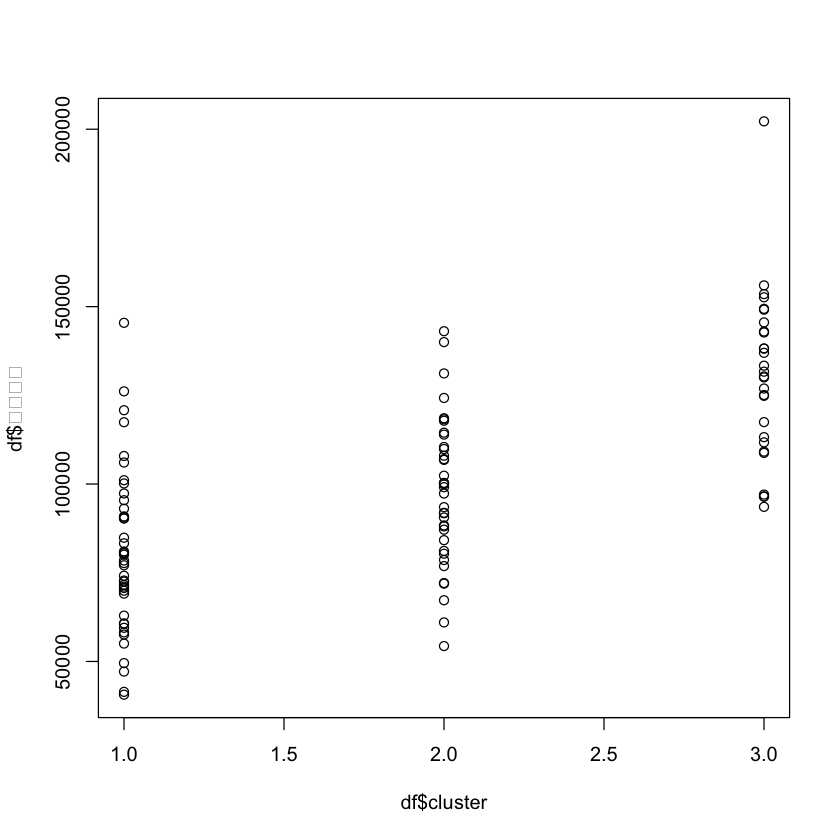

In [213]:
plot(df$cluster,df$상영횟수)

In [216]:
arrange(df[df$cluster == 1,],desc(상영횟수))

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,배급사점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,감독점수2,감독점수3,주연점수2,조연점수2
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,2,8.250000,4.062019,8.250000,4.062019,12.250000,4.000000,4,2.750000,2.833333
암수살인,32998321048,3789553,1177,126128,2018-10-03,(주)쇼박스,15세이상관람가,"범죄,드라마",김태균,...,3,12.800000,5.349922,12.800000,5.349922,12.250000,1.600000,8,3.200000,2.988095
돈,28870244062,3389125,1431,120809,2019-03-20,(주)쇼박스,15세이상관람가,범죄,박누리,...,3,11.200000,5.004394,11.200000,5.004394,9.300000,4.000000,4,3.200000,2.511111
꾼,31313568795,4018341,1314,117419,2017-11-22,(주)쇼박스,15세이상관람가,범죄,장창원,...,3,8.000000,3.722419,8.000000,3.722419,10.555556,4.000000,4,2.666667,2.609259
탐정: 리턴즈,26909514678,3152895,1137,107909,2018-06-13,CJ ENM,15세이상관람가,"코미디,범죄",이언희,...,3,9.200000,4.535617,9.200000,4.535617,10.555556,2.500000,5,2.800000,2.759259
건축학개론,30223590400,4111237,593,106069,2012-03-22,(주)롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,2,6.500000,3.031895,3.250000,2.549510,11.500000,4.000000,4,2.500000,2.805556
국가부도의 날,30893315837,3755233,1180,101077,2018-11-28,CJ ENM,12세이상관람가,드라마,최국희,...,3,11.750000,4.959511,11.750000,4.959511,10.250000,2.500000,5,3.250000,2.896296
스물,23563705686,3044859,926,100167,2015-03-25,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"코미디,드라마",이병헌,...,2,6.250000,3.535534,6.250000,3.535534,4.000000,7.000000,21,2.250000,2.000000
악인전,29133760150,3364712,1307,97351,2019-05-15,(주)에이스메이커무비웍스,청소년관람불가,"범죄,액션",이원태,...,1,9.666667,5.393789,9.666667,5.393789,10.000000,2.500000,5,3.000000,2.700000
그것만이 내 세상,27456797382,3420172,956,95437,2018-01-17,CJ ENM,12세이상관람가,"코미디,드라마",최성현,...,3,11.375000,5.672156,11.375000,5.672156,7.000000,4.000000,4,3.125000,2.222222


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <83>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <81>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟

“conversion failure on 'arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <98>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <81>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'arrange(df[df$cluster == 1, ], desc(상영횟수))$상영횟수' in 'mbcsToSbcs': dot substituted for <9f>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure 

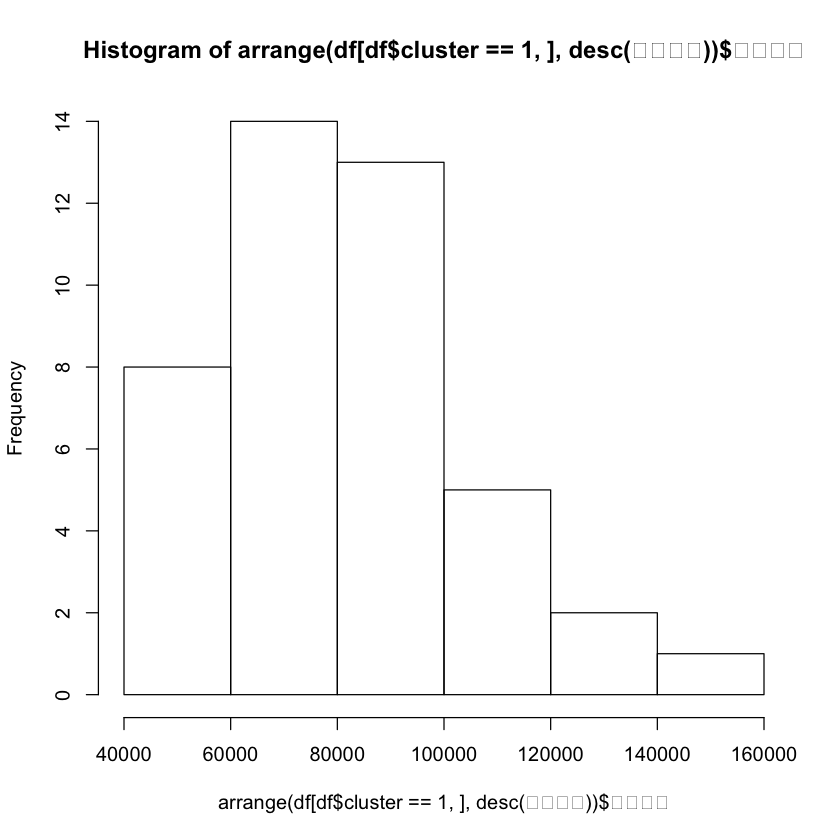

In [217]:
hist(arrange(df[df$cluster == 1,],desc(상영횟수))$상영횟수)

In [218]:
head(df2)

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,평균스크린점유율,평스_증가율,감독점수2,감독점수3,주연점수2,조연점수2
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,8.00,20.39078,40.117994,2.000000,6,2.000000,2.600000
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.250000,4.062019,8.250000,4.062019,12.25,46.11887,9.748892,4.000000,4,2.750000,3.250000
1,3117859,36.90476,1,10,0,2.333333,4.000000,4.000000,2.000000,0.000000,0.000000,10.60,33.81410,20.119225,3.000000,9,2.000000,3.000000
1,4313101,35.27944,3,10,3,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250,10.60,31.98603,22.956522,2.714286,19,2.333333,3.000000
1,3024666,21.64329,3,10,0,3.500000,7.666667,7.666667,5.153456,7.666667,5.153456,14.50,19.43888,25.581395,2.500000,5,2.500000,3.500000
1,4111237,28.49592,2,20,6,3.500000,6.500000,6.500000,3.031895,3.250000,2.549510,11.50,27.43873,8.014572,4.000000,4,2.500000,3.166667


In [219]:
temp.kmeans <- kmeans(df2[,c(3,4,5,6,7,8,19)], centers = 3, iter.max = 100)

In [220]:
df7<-df2

In [221]:
df7$cluster2 <-temp.kmeans$cluster

In [224]:
table(df7$cluster,df7$cluster2)

   
     1  2  3
  1 22 21  0
  2 17 15  5
  3 12  6 10